In [28]:
import numpy as np
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from pylab import rcParams

### Task 1: (30% of credit)
#### (1) Consder the dataset 1 below, with two-dimensional observations X classified into 2 categories using vector Y. As you can see from the plot the dataset is linearly separable. Train a linear SVM (setting C=100000 just to emphasize that no slack variables are admitted). 
#### a. Report the separating hyperplane (line).
#### b. Calculate the margin.
#### c. List the support vectors.

#### (2) Add the separating line to the plot, visualize the margin and mark the support vectors.

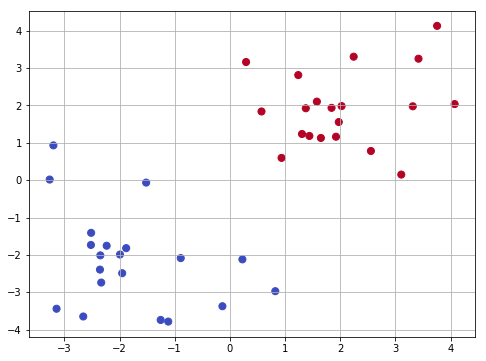

In [29]:
#Data
data1=pd.read_csv('dataset1.csv')
X=data1.iloc[:,:2]
Y=data1.iloc[:,2]
rcParams['figure.figsize'] = 8, 6
plt.grid()
plt.scatter(X.iloc[:,0], X.iloc[:,1], s=50, c=Y, cmap=plt.cm.get_cmap('coolwarm', 2));

#### Solution:

1.
(a).

In [30]:
clf = svm.SVC(kernel='linear',C=100000) #you can try other C and find the model not too sensitive to it - it seems the only reasonable split is too obvious to depend on it 
clf.fit(X, Y)

SVC(C=100000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [31]:
# get the separating hyperplane
w = clf.coef_[0]
w


array([0.66329036, 0.56359437])

- Here is the weight of the hyperplane

(b). Show up and down of margins

In [32]:
########################################################################
a = -w[0] / w[1]
x1 = np.linspace(-4, 5)
x2 = a * x1 - (clf.intercept_[0]) / w[1]


# support vectors
b = clf.support_vectors_[0]
x2_down = a * x1 + (b[1] - a * b[0])
b = clf.support_vectors_[-1]
x2_up = a * x1 + (b[1] - a * b[0])

In [33]:
x2_down

array([ 2.85576492,  2.63960087,  2.42343682,  2.20727277,  1.99110872,
        1.77494468,  1.55878063,  1.34261658,  1.12645253,  0.91028848,
        0.69412443,  0.47796038,  0.26179633,  0.04563228, -0.17053177,
       -0.38669582, -0.60285987, -0.81902392, -1.03518797, -1.25135202,
       -1.46751607, -1.68368012, -1.89984417, -2.11600822, -2.33217227,
       -2.54833632, -2.76450037, -2.98066442, -3.19682847, -3.41299252,
       -3.62915657, -3.84532062, -4.06148467, -4.27764872, -4.49381277,
       -4.70997682, -4.92614087, -5.14230492, -5.35846897, -5.57463302,
       -5.79079707, -6.00696112, -6.22312517, -6.43928922, -6.65545327,
       -6.87161732, -7.08778137, -7.30394542, -7.52010947, -7.73627352])

In [34]:
x2_up

array([ 6.40566375,  6.1894997 ,  5.97333565,  5.7571716 ,  5.54100755,
        5.3248435 ,  5.10867945,  4.8925154 ,  4.67635135,  4.4601873 ,
        4.24402325,  4.0278592 ,  3.81169515,  3.5955311 ,  3.37936705,
        3.163203  ,  2.94703895,  2.7308749 ,  2.51471085,  2.2985468 ,
        2.08238275,  1.8662187 ,  1.65005465,  1.4338906 ,  1.21772655,
        1.0015625 ,  0.78539845,  0.5692344 ,  0.35307035,  0.1369063 ,
       -0.07925775, -0.2954218 , -0.51158585, -0.7277499 , -0.94391395,
       -1.160078  , -1.37624205, -1.5924061 , -1.80857015, -2.0247342 ,
       -2.24089825, -2.4570623 , -2.67322635, -2.8893904 , -3.10555445,
       -3.3217185 , -3.53788255, -3.7540466 , -3.97021065, -4.1863747 ])

(c). show support vectors

In [35]:
clf.support_vectors_

array([[ 0.22627536, -2.11810965],
       [-1.5180363 , -0.06399383],
       [ 0.93564585,  0.5969359 ]])

2.Plot

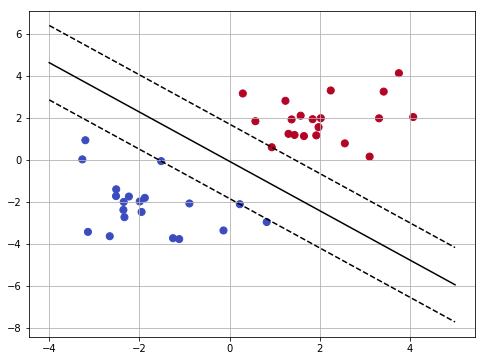

In [36]:

plt.plot(x1, x2, 'k-')
plt.plot(x1, x2_down, 'k--')
plt.plot(x1, x2_up, 'k--')
plt.grid()
plt.scatter(X.iloc[:,0], X.iloc[:,1], s=50, c=Y, cmap=plt.cm.get_cmap('coolwarm', 2));
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=200, facecolors='none')

### Task 2 (30% of credit)

#### (1)Train SVM with soft margin on the training subset of the dataset 2 below. First try C=0.01, and visualize the seperation over the training set. Report the in-sample and out-of-sample accuracy acheived by SVM over the training and test sets.

#### (2) Try various regulatization constants C from the sequence below and use the validation subset in order to evaluate perfomance of the classifier. Plot the validation accuracy vs log(C).  
C=[math.exp(i) for i in np.linspace(-10,5,200)]   

#### (3) Select optimal C based on the validation accuracy above and report new out-of-sample accuracy of the classifier over the test set while using this optimal C.


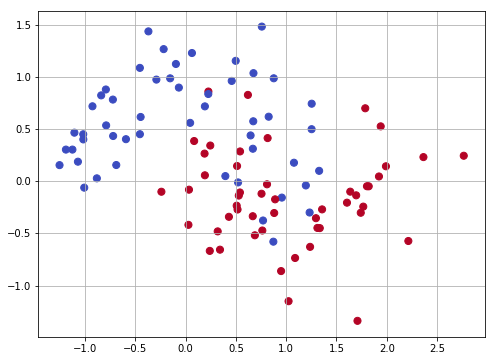

In [37]:
#Data
data2=pd.read_csv('dataset2.csv')
X=data2.iloc[:,:2]
Y=data2.iloc[:,2]
plt.grid()
plt.scatter(X.iloc[:,0], X.iloc[:,1], s=50, c=Y, cmap=plt.cm.get_cmap('coolwarm', 2));

#Generate training(X_train, Y_train) and testing data(X_test,Y_test) sets from Data(X,Y) for out of sample test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.33, random_state=1)

#Generate validation(X_vali, Y_vali) and testing data(X_train_1,Y_train_1) sets from training data(X_train,Y_train)
#for training arguments
X_train_1,X_vali,Y_train_1,Y_vali = train_test_split(
    X_train, Y_train, test_size=0.33, random_state=99)

### Solutions:

(1) C is 0.01 here

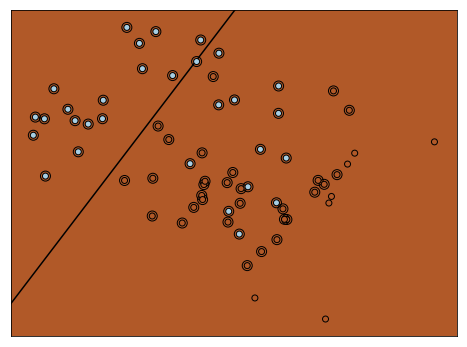

In [38]:
clf = svm.SVC(kernel='linear',C=0.01) #you can try other C and find the model not too sensitive to it - it seems the only reasonable split is too obvious to depend on it 

clf.fit(X_train, Y_train)


plt.clf()

plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
            facecolors='none', edgecolors='k', zorder=10) # plot support vectors with small circle

plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=Y_train, zorder=10, edgecolors='k',cmap=plt.cm.Paired) # plot X,Y

plt.axis('tight')
x_min = -2
x_max = 3
y_min = -2
y_max = 3

XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j] # all the points in the plane
Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()]) # put them in the desion function

# Put the result into a color plot
Z = Z.reshape(XX.shape)

plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired) # Make a color for all the points in plane by our decision function.

plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
            levels=[-.5, 0, .5])
# plt.xlim(x_min, x_max)
# plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

In [39]:
# Let's calculate the IS errors: (Just use clf.predict to compare the predicted labels with current labels)
print ("we successfully(In Sample) predict the {} percent of data".format(100-abs(clf.predict(X_train)-Y_train).sum()*50/len(Y_train)))

we successfully(In Sample) predict the 78 percent of data


In [40]:
# Let's see the OS test
# As usual, let's devide our data to test data and train data.


right=1.0*(clf.predict(X_test)==np.asarray(Y_test)).sum()/len(Y_test)

print ("we successfully(Out Sample) predict the {} percent of data".format((right)*100))

we successfully(Out Sample) predict the 39.3939393939 percent of data


(2)

#### (For this question people could have different C. Any C that is bigger than 1, is a safe choice. But the corresponding accuracy should be around 0.78.) 

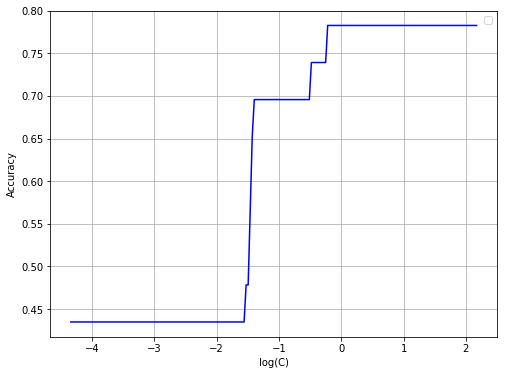

The optimal C we found is:9.83976826817 and the corresponding accuracy is:0.782608695652


In [41]:
#Let's do cross validation for choosing C since we see the result is not
#very good.
import pylab
import math
#When C is very small, which means we want to tolerate more mistakes. If C is very big, this
#means we hardly tolerate any mistakes. So, we cannot make a very big C if our data is not
#really seperable. Let's however choose from a broad range of reasonable options
C = np.linspace(-10,5,200)
C=[math.exp(i) for i in C]
OS_validation=[]
for c in C:
    clf = svm.SVC(kernel='linear',C=c) 
    clf.fit(X_train_1, Y_train_1)
    right=1.0*(clf.predict(X_vali)==np.asarray(Y_vali)).sum()/len(Y_vali)
    OS_validation.append(right)
temp=pd.DataFrame([C,OS_validation]).T
ind=len(temp.loc[temp.iloc[:,1]==temp.iloc[:,1].max()])/2 # Let's take the middle one for safty
C_opt=temp.loc[temp.iloc[:,1]==temp.iloc[:,1].max()].iloc[int(ind),0]

C=[math.log(y,10) for y in C] #for a better graph
pylab.plot(C,OS_validation,'b',)
pylab.legend(loc='upper right')
pylab.ylabel('Accuracy')
pylab.xlabel('log(C)')
pylab.plt.grid()
pylab.show()

print("The optimal C we found is:{} and the corresponding accuracy is:{}".format(C_opt,temp.iloc[:,1].max())) # I choose the biggest one.


(3)

#### (The answer could be different for people who have different optimal C. However it should be around 80 percent.)

In [42]:
clf = svm.SVC(kernel='linear',C=C_opt)
clf.fit(X_train, Y_train)
correct=1.0*(clf.predict(X_test)==np.asarray(Y_test)).sum()/len(Y_test)
print ("we successfully(Out Sample) predict the {} percent of data by using linear model".format((correct)*100))

we successfully(Out Sample) predict the 81.8181818182 percent of data by using linear model


### Task 3 (40% of credit)

#### (1) Train polynomial SVM over the training subset of the dataset 3 provided below. Use the default arguments, and plot the seperation result. Report classification accuracy for the training and test sets.

#### (2) Use validation subset in order to pick the optimal parameters for the polynomial model.

(a) Try the degrees 1,2,3,4. For each degree, consider variety of regularization constants from the range

C=[math.exp(i) for i in np.linspace(-10,2*degree,200)]

in order to evaluate the classifier performance over the validation set.

(b) Plot graph "Accuracy vs log(C)" for each degree, and pick optimal degree and regularization constant C based on these graphs. Report your optimal degree and C.

(c) Use optimal degree and regularization constant C to compute and report the final out-of-sample accuracy of the best classification model selected. 


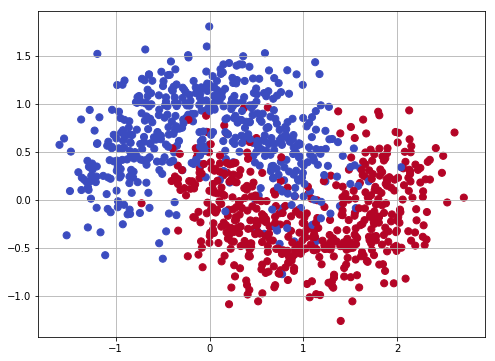

In [43]:
#Data 
data3=pd.read_csv('dataset3.csv')
X=data3.iloc[:,:2]
Y=data3.iloc[:,2]
plt.grid()
plt.scatter(X.iloc[:,0], X.iloc[:,1], s=50, c=Y, cmap=plt.cm.get_cmap('coolwarm', 2));

#Generate training(X_train, Y_train) and testing data(X_test,Y_test) sets from Data(X,Y) for out of sample test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.33, random_state=1)

#Generate validation(X_vali, Y_vali) and testing data(X_train_1,Y_train_1) sets from training data(X_train,Y_train)
#for training arguments(degree and C)
X_train_1,X_vali,Y_train_1,Y_vali = train_test_split(
    X_train, Y_train, test_size=0.33, random_state=99)

### Solutions

(1)

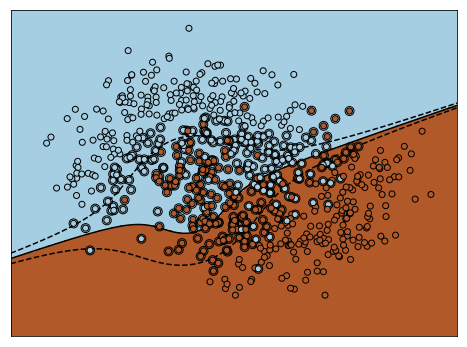

In [44]:
clf = svm.SVC(kernel='poly') 
clf.fit(X_train, Y_train)
plt.clf()

plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,
            facecolors='none',edgecolors='k', zorder=10)
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=Y_train, edgecolors='k',zorder=10, cmap=plt.cm.Paired)

plt.axis('tight')
x_min = -2
x_max = 3
y_min = -1.5
y_max = 2

XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

# Put the result into a color plot
Z = Z.reshape(XX.shape)

plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
            levels=[-.5, 0, .5])

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

plt.xticks(())
plt.yticks(())
plt.show()

In [45]:
print ("we successfully predict(training set) the {} percent of data".format((Y_train==clf.predict(X_train)).sum()*100/len(Y_train)))

we successfully predict(training set) the 81 percent of data


In [46]:
correct=1.0*(clf.predict(X_test)==Y_test).sum()/len(Y_test)

print ("we successfully(test set) predict the {} percent of data".format((correct)*100))

we successfully(test set) predict the 82.7272727273 percent of data


(2)
a. & b.
- combine a and b answer here

#### Look carefully at the plot. Here the accuracy goes down when we increase log(C). If you choose optimal C in the end of the period when C reaches max as we did in class, you could have problems (might not, no garuantee). So you might have your own way of picking the optimal C, but you should have a similar OS result in next question. 

In [47]:
import pylab

def svmPoly(X_train, Y_train, X_valid, Y_valid, d):
    # perform the validation to pick up the best parameters and train the classifier
    
    M=[0]*len(d)
    C_opt=[0]*len(d)
    
    for d_ in range(0,len(d)):
        degree=d[d_]
        OS_validation=[]
        C = np.linspace(-10,2*degree,200)
        C=[math.exp(i) for i in C]
        for i in range(0,len(C)):
            clf = svm.SVC(kernel='poly', gamma='auto',C=C[i],degree=degree)#max_iter=100) 
            clf.fit(X_train, Y_train)
            right=1.0*(clf.predict(X_valid)==np.asarray(Y_valid)).sum()/len(Y_valid)
            OS_validation.append(right)
        OS_validation=np.array(OS_validation)    
        M[d_]=max(OS_validation)
        ind=np.where(OS_validation == M[d_])
        C_opt[d_]=C[ind[0][0]]
        
        C=[math.log(y,10) for y in C]# for a better graph
        pylab.plot(C,OS_validation,'b',)
        pylab.legend(loc='upper right')
        pylab.ylabel('Accuracy')
        pylab.xlabel('log(C)')
        pylab.grid()
        pylab.show()
        
        print("for degree={0}, we get max accuracy={1} with C={2}:".format(degree,M[d_],C_opt[d_]))
    M_=max(M)
    d_=M.index(M_)
    return svm.SVC(kernel='poly',gamma='auto',C=C_opt[d_],degree=d[d_])

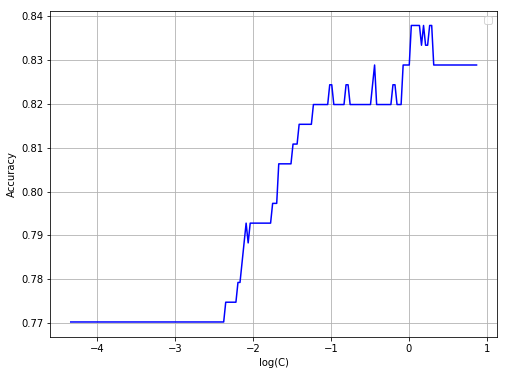

for degree=1, we get max accuracy=0.837837837838 with C=1.0728855118:


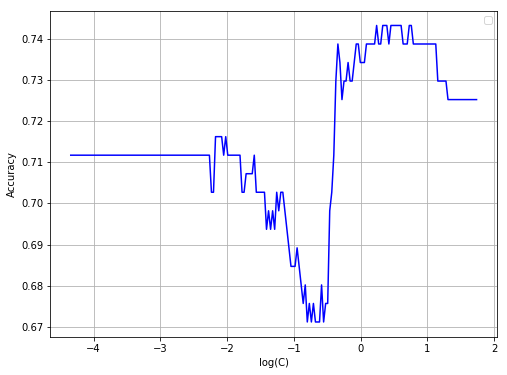

for degree=2, we get max accuracy=0.743243243243 with C=1.73805004165:


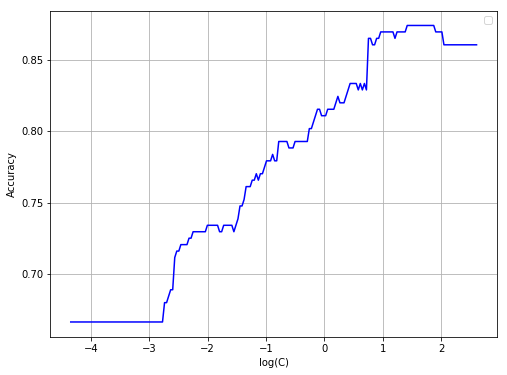

for degree=3, we get max accuracy=0.873873873874 with C=26.2149971758:


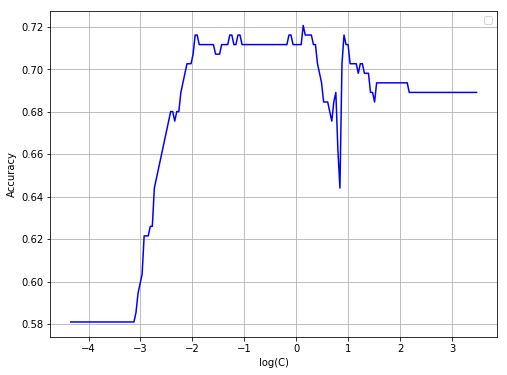

for degree=4, we get max accuracy=0.720720720721 with C=1.36555069788:


In [48]:
clf=svmPoly(X_train_1, Y_train_1, X_vali, Y_vali,range(1,5))

(2) c.

In [49]:
clf.fit(X_train, Y_train)
correct=1.0*(clf.predict(X_test)==np.asarray(Y_test)).sum()/len(Y_test)
print ("we successfully(OS) predict the {} percent of data by poly".format((correct)*100))

we successfully(OS) predict the 89.0909090909 percent of data by poly
